In [1]:
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, BatchNormalization, Activation, Dropout
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
seed_value= 10

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

In [3]:
labels = pd.read_csv('trainLabels.csv')

In [4]:
train_images = []
for i in labels.id:
    train_images.append(imread('train/'+str(i)+'.png'))

X_train = np.array(train_images)

In [5]:
animals = sorted(labels.label.unique())
mapping = {}
for i in range(len(animals)):
    mapping[animals[i]] = i

reversed_mapping = {v:k for k,v in mapping.items()}

In [6]:
y_train = labels.label.apply(lambda x: mapping[x])
y_cat_train = to_categorical(y_train,10)

In [7]:
(_, _), (X_test, y_test) = cifar10.load_data()
X_test = X_test/255

In [8]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), 
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

## THIRD SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
model.add(Conv2D(filters=128, kernel_size=(3,3),input_shape=(32, 32, 3),
                 activation='relu', padding = 'same', kernel_initializer='he_uniform'))
# POOLING LAYER
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# BATCH NORMALIZATION
model.add(BatchNormalization())


# FLATTENING IMAGES
model.add(Flatten())

# HIDDEN LAYER
model.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

# OUTPUT LAYER
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=20)

In [11]:
model.fit(X_train, y_cat_train, epochs=200, validation_data=(X_test, to_categorical(y_test,10)), callbacks=[early_stop])

Epoch 1/200
1563/1563 [==============================] - 233s 149ms/step - loss: 2.0113 - accuracy: 0.2648 - val_loss: 1.3297 - val_accuracy: 0.5123
Epoch 2/200
1563/1563 [==============================] - 230s 147ms/step - loss: 1.3245 - accuracy: 0.5188 - val_loss: 1.0396 - val_accuracy: 0.6330
Epoch 3/200
1563/1563 [==============================] - 231s 148ms/step - loss: 1.0273 - accuracy: 0.6378 - val_loss: 0.9354 - val_accuracy: 0.6818
Epoch 4/200
1563/1563 [==============================] - 230s 147ms/step - loss: 0.8942 - accuracy: 0.6863 - val_loss: 0.7915 - val_accuracy: 0.7226
Epoch 5/200
1563/1563 [==============================] - 229s 147ms/step - loss: 0.8009 - accuracy: 0.7233 - val_loss: 0.8735 - val_accuracy: 0.7039
Epoch 6/200
1563/1563 [==============================] - 228s 146ms/step - loss: 0.7416 - accuracy: 0.7431 - val_loss: 0.7653 - val_accuracy: 0.7416
Epoch 7/200
1563/1563 [==============================] - 228s 146ms/step - loss: 0.6942 - accuracy: 0.7585

<AxesSubplot:>

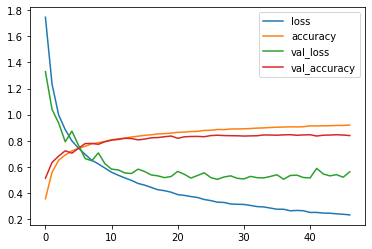

In [12]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [13]:
predictions = model.predict_classes(X_test)

C:\Users\Mateusz\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [14]:
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.87      0.96      0.91      1000
           2       0.82      0.75      0.78      1000
           3       0.76      0.60      0.67      1000
           4       0.85      0.82      0.83      1000
           5       0.76      0.78      0.77      1000
           6       0.87      0.88      0.87      1000
           7       0.86      0.90      0.88      1000
           8       0.88      0.91      0.89      1000
           9       0.88      0.91      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



array([[876,  20,  20,   4,   4,   1,   1,   5,  45,  24],
       [  5, 960,   0,   0,   2,   2,   1,   0,   6,  24],
       [ 56,   6, 753,  18,  41,  45,  43,  20,  12,   6],
       [ 31,  13,  52, 597,  40, 138,  51,  29,  23,  26],
       [ 15,   3,  34,  28, 820,  20,  22,  49,   7,   2],
       [  9,   5,  30,  87,  20, 783,  14,  36,   9,   7],
       [ 12,   9,  22,  31,  15,   8, 880,   4,  15,   4],
       [ 11,   2,   6,  14,  24,  26,   2, 901,   3,  11],
       [ 36,  25,   3,   3,   0,   1,   1,   0, 912,  19],
       [ 12,  62,   1,   1,   0,   1,   1,   3,   9, 910]], dtype=int64)

<AxesSubplot:>

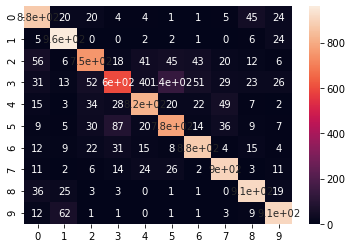

In [15]:
sns.heatmap(confusion_matrix(y_test,predictions), annot = True)

In [16]:
test_images = []
for i in range(1,300_001):
    test_images.append(imread('test/'+str(i)+'.png'))
X_test = np.array(test_images)
predictions = model.predict_classes(X_test)

In [17]:
prediction_labels = [reversed_mapping[x] for x in predictions]
predictions_df = pd.DataFrame({'id':range(1,len(prediction_labels)+1), 'label':prediction_labels})
predictions_df.to_csv("kaggle_final_new_6.csv", index = None)

In [18]:
predictions2_df = pd.DataFrame(model.predict(X_test))
predictions2_df.to_csv("kaggle_final_new_6_classes.csv", index = None)